In [1]:
import data_transformer as transformer

In [2]:
X, y = transformer.make_input_target()

Subject:   0%|          | 0/7 [00:00<?, ?it/s]

keep_interictal:   0%|          | 0/1006 [00:00<?, ?it/s]

keep_preictal:   0%|          | 0/1006 [00:00<?, ?it/s]

keep_interictal:   0%|          | 0/1542 [00:00<?, ?it/s]

keep_preictal:   0%|          | 0/1542 [00:00<?, ?it/s]

keep_interictal:   0%|          | 0/2419 [00:00<?, ?it/s]

keep_preictal:   0%|          | 0/2419 [00:00<?, ?it/s]

keep_interictal:   0%|          | 0/1891 [00:00<?, ?it/s]

keep_preictal:   0%|          | 0/1891 [00:00<?, ?it/s]

keep_interictal:   0%|          | 0/671 [00:00<?, ?it/s]

keep_preictal:   0%|          | 0/671 [00:00<?, ?it/s]

keep_interictal:   0%|          | 0/263 [00:00<?, ?it/s]

keep_preictal:   0%|          | 0/263 [00:00<?, ?it/s]

keep_interictal:   0%|          | 0/210 [00:00<?, ?it/s]

keep_preictal:   0%|          | 0/210 [00:00<?, ?it/s]

In [3]:
print(X.shape)
print(y.shape)

(4067,)
(4067,)


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
print('Training:', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)

Training: (2724,) (2724,)
Validation: (1343,) (1343,)


In [7]:
print(X_train[0], y_train[0])

./data/Dog_5/Dog_5/Dog_5_interictal_segment_0280.mat 0


In [8]:
set(y_train)

{0, 1}

In [9]:
from scipy.io import loadmat

In [10]:
mat = loadmat(X_train[0])
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Aug 21 01:00:00 2014',
 '__version__': '1.0',
 '__globals__': [],
 'interictal_segment_280': array([[(array([[ 60,  12,  60, ...,   2, -19,  30],
                [-33,  20, -36, ..., -47,  29, -18],
                [ 14,  14,  -3, ...,  12,  34,  16],
                ...,
                [-16,  58, -12, ..., -35,  28, -29],
                [-13,  -7,  27, ...,  29, -10,  -6],
                [-35,  -5, -15, ...,   1,  24,  28]], dtype=int16), array([[600]], dtype=uint16), array([[399.6097561]]), array([[array(['NVC0905_22_004_Ecog_c001'], dtype='<U24'),
                 array(['NVC0905_22_004_Ecog_c002'], dtype='<U24'),
                 array(['NVC0905_22_004_Ecog_c003'], dtype='<U24'),
                 array(['NVC0905_22_004_Ecog_c005'], dtype='<U24'),
                 array(['NVC0905_22_004_Ecog_c006'], dtype='<U24'),
                 array(['NVC0905_22_004_Ecog_c007'], dtype='<U24'),
                 array(['NVC

In [11]:
segment_name = list(mat.keys())[-1]
seg = mat[segment_name]
seg['data'][0][0].shape

(15, 239766)

In [12]:
seg['channels'][0][0][0].shape

(15,)

In [13]:
seg['data'][0][0]

array([[ 60,  12,  60, ...,   2, -19,  30],
       [-33,  20, -36, ..., -47,  29, -18],
       [ 14,  14,  -3, ...,  12,  34,  16],
       ...,
       [-16,  58, -12, ..., -35,  28, -29],
       [-13,  -7,  27, ...,  29, -10,  -6],
       [-35,  -5, -15, ...,   1,  24,  28]], dtype=int16)

Dimension: (channel x voltage)

In [14]:
def get_sig(mat):
    segment_name = list(mat.keys())[-1]
    segment = mat[segment_name]
    sig = segment['data'][0][0]
    return sig

In [20]:
def get_channels(mat):
    segment_name = list(mat.keys())[-1]
    segment = mat[segment_name]
    channels = seg['channels'][0][0][0]
    return channels

In [26]:
def get_fs(mat):
    "Returns the sampling frequency."
    segment_name = list(mat.keys())[-1]
    segment = mat[segment_name]
    fs = segment['sampling_frequency'][0][0][0][0]
    return fs

In [15]:
from tqdm.auto import trange

In [16]:
X_train_mat = []
for i in trange(len(X_train), desc='get_sig'):
    path = X_train[i]
    mat = loadmat(path)
    X_train_mat.append(mat)

get_sig:   0%|          | 0/2724 [00:00<?, ?it/s]

In [18]:
X_train_mat[0]

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Aug 21 01:00:00 2014',
 '__version__': '1.0',
 '__globals__': [],
 'interictal_segment_280': array([[(array([[ 60,  12,  60, ...,   2, -19,  30],
                [-33,  20, -36, ..., -47,  29, -18],
                [ 14,  14,  -3, ...,  12,  34,  16],
                ...,
                [-16,  58, -12, ..., -35,  28, -29],
                [-13,  -7,  27, ...,  29, -10,  -6],
                [-35,  -5, -15, ...,   1,  24,  28]], dtype=int16), array([[600]], dtype=uint16), array([[399.6097561]]), array([[array(['NVC0905_22_004_Ecog_c001'], dtype='<U24'),
                 array(['NVC0905_22_004_Ecog_c002'], dtype='<U24'),
                 array(['NVC0905_22_004_Ecog_c003'], dtype='<U24'),
                 array(['NVC0905_22_004_Ecog_c005'], dtype='<U24'),
                 array(['NVC0905_22_004_Ecog_c006'], dtype='<U24'),
                 array(['NVC0905_22_004_Ecog_c007'], dtype='<U24'),
                 array(['NVC

In [19]:
len(X_train_mat)

2724

In [22]:
get_channels(X_train_mat[0]).shape

(15,)

In [24]:
get_sig(X_train_mat[0]).shape

(15, 239766)

In [28]:
fs = get_fs(X_train_mat[0])

In [29]:
import numpy as np

In [30]:
N = get_sig(X_train_mat[0]).shape[1]
t = np.arange(0, N) / fs

In [31]:
import matplotlib.pyplot as plt

In [42]:
sig = get_sig(X_train_mat[0])
sig[14].shape

(239766,)

Single channel plot

Text(0, 0.5, '$\\mu V$')

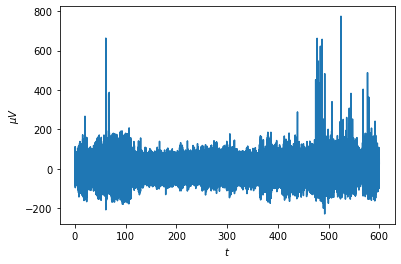

In [45]:
fig, ax = plt.subplots()
ax.plot(t, sig[14])
ax.set_xlabel('$t$')
ax.set_ylabel('$\mu V$')

All channels plot.

Text(21.200000000000003, 0.5, '$\\mu V$')

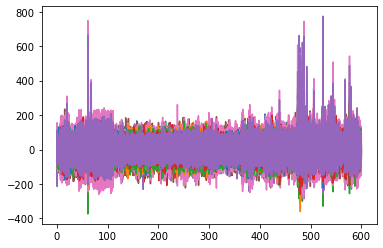

In [48]:
plt.plot(t, sig.T)
ax.set_xlabel('$t$')
ax.set_ylabel('$\mu V$')